In [50]:
# 1st program.....
# A* Algorithm


from collections import deque



class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis

    def get_neighbors(self, v):
        return self.adjac_lis[v]

    # This is heuristic function which is having equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }

        return H[n]

    def a_star_algorithm(self, start, stop):
        # In this open_lst is a lisy of nodes which have been visited, but who's 
        # neighbours haven't all been always inspected, It starts off with the start 
  #node
        # And closed_lst is a list of nodes which have been visited
        # and who's neighbors have been always inspected
        open_lst = set([start])
        closed_lst = set([])

        # poo has present distances from start to all other nodes
        # the default value is +infinity
        poo = {}#store the distance from starting node
        poo[start] = 0

        # par contains an adjac mapping of all nodes
        par = {}
        par[start] = start

        while len(open_lst) > 0:
            n = None

            # it will find a node with the lowest value of f() -
            for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop
            # then we start again from start
            if n == stop:
                reconst_path = []

                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]

                reconst_path.append(start)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all the neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
              # if the current node is not presentin both open_lst and closed_lst
                # add it to open_lst and note n as it's par
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update par data and poo data
                # and if the node was in the closed_lst, move it to open_lst
                else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n

                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)

            # remove n from the open_lst, and add it to closed_lst
            # because all of his neighbors were inspected
            open_lst.remove(n)
            closed_lst.add(n)

        print('Path does not exist!')
        return None
adjac_lis = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')



Path found: ['A', 'B', 'D']


['A', 'B', 'D']

observation the gmm using em algorithm based clusterig matched


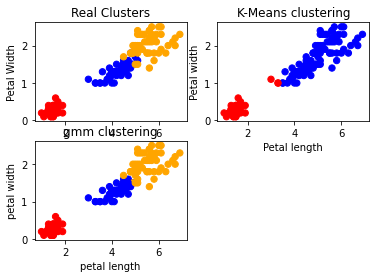

In [51]:
# 7 program...
#


import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

iris = datasets.load_iris() #https://stackoverflow.com/questions/43159754/datasets-load-iris-in-python
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=2)
model.fit(X)
model = KMeans(n_clusters=2)
model.fit(X)
colormap = np.array(['red', 'blue', 'orange'])

plt.subplot(2,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) # https://www.w3schools.com/python/matplotlib_scatter.asp
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means clustering')
plt.xlabel('Petal length')
plt.ylabel('Petal width')


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xas = scaler.transform(X)
xs = pd.DataFrame(xas, columns=X.columns)

from sklearn.mixture import GaussianMixture
gmm =GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)


plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('gmm clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')

print('observation the gmm using em algorithm based clusterig matched')

In [52]:
# 8 program...
#


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris=datasets.load_iris()  # https://stackoverflow.com/questions/43159754/datasets-load-iris-in-python
print("Iris dataset loaded")


x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing")
print("Size of training data and its label",x_train.shape,y_train.shape)
print("Size of testing data and its label",x_test.shape,y_test.shape)

for i in range(len(iris.target_names)):
    print("Label",i,"-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

print("Results of Classification using K-nn with K=1")
for r in range(0,len(x_test)):
    print("Sample:",str(x_test[r]),"Actual-label:",str(y_test[r]),"Predicted-label:",str(y_pred[r]))
print("Classification Accuracy:",classifier.score(x_test,y_test))




Iris dataset loaded
Dataset is split into training and testing
Size of training data and its label (135, 4) (135,)
Size of testing data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1
Sample: [4.5 2.3 1.3 0.3] Actual-label: 0 Predicted-label: 0
Sample: [5.6 2.8 4.9 2. ] Actual-label: 2 Predicted-label: 2
Sample: [7.7 2.8 6.7 2. ] Actual-label: 2 Predicted-label: 2
Sample: [7.2 3.2 6.  1.8] Actual-label: 2 Predicted-label: 2
Sample: [6.5 3.  5.2 2. ] Actual-label: 2 Predicted-label: 2
Sample: [5.7 2.8 4.1 1.3] Actual-label: 1 Predicted-label: 1
Sample: [4.9 2.4 3.3 1. ] Actual-label: 1 Predicted-label: 1
Sample: [5.9 3.  5.1 1.8] Actual-label: 2 Predicted-label: 2
Sample: [5.1 3.4 1.5 0.2] Actual-label: 0 Predicted-label: 0
Sample: [4.8 3.4 1.6 0.2] Actual-label: 0 Predicted-label: 0
Sample: [6.7 2.5 5.8 1.8] Actual-label: 2 Predicted-label: 2
Sample: [5.  3.6 1.4 0.2] Actual-label: 0 Predicted-label: 0


In [53]:
# iris() dataset....
#

iris = datasets.load_iris()

print('The data matrix:\n',iris['data'])
print('The classification target:\n',iris['target'])
print('The names of the dataset columns:\n',iris['feature_names'])
print('The names of target classes:\n',iris['target_names'])
print('The full description of the dataset:\n',iris['DESCR'])
print('The path to the location of the data:\n',iris['filename'])

The data matrix:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5